In [1]:
# Import dependency
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
from datetime import datetime
import os
import pandas as pd

In [2]:
# Output File (CSV)
output_data_file = "Source Data/Cafes_and_restaurants__with_seating_capacity.csv"

In [3]:
# Reading the file and convert into a Dataframe
raw_df = pd.read_csv(output_data_file)
raw_df.head()

,Census year,Block ID,Property ID,Base property ID,Building address,CLUE small area,Business address,Industry (ANZSIC4) code,Industry (ANZSIC4) description,Seating type,Number of seats,x coordinate,y coordinate,Location
0,2002,2,111467,103973,0 King Street MELBOURNE 3000,Melbourne (CBD),469-479 King Street MELBOURNE 3000,8921,Zoological and Botanical Gardens Operation,Seats - Indoor,113,144.9595,-37.8206,POINT (144.9595 -37.8206)
1,2002,2,111467,103973,0 King Street MELBOURNE 3000,Melbourne (CBD),469-479 King Street MELBOURNE 3000,8921,Zoological and Botanical Gardens Operation,Seats - Outdoor,38,144.9595,-37.8206,POINT (144.9595 -37.8206)
2,2002,4,103972,103972,363-397 Flinders Street MELBOURNE 3000,Melbourne (CBD),"Vault 12, 387 Flinders Street MELBOURNE 3000",9539,Other Personal Services n.e.c.,Seats - Indoor,15,144.9623,-37.8195,POINT (144.9623 -37.8195)
3,2002,4,103972,103972,363-397 Flinders Street MELBOURNE 3000,Melbourne (CBD),"Vault 1, 363-367 Flinders Street MELBOURNE 3000",9111,Health and Fitness Centres and Gymnasia Operation,Seats - Indoor,20,144.9623,-37.8195,POINT (144.9623 -37.8195)
4,2002,4,103972,103972,363-397 Flinders Street MELBOURNE 3000,Melbourne (CBD),"Vault 1, 363-367 Flinders Street MELBOURNE 3000",9111,Health and Fitness Centres and Gymnasia Operation,Seats - Outdoor,18,144.9623,-37.8195,POINT (144.9623 -37.8195)


In [4]:
# Identify the variety of industry types within the dataset
unique_industry = raw_df['Industry (ANZSIC4) description'].unique()
industry_count = len(unique_industry)
print(unique_industry)
print(f'Number of total industry: {industry_count}')

['Zoological and Botanical Gardens Operation'
 'Other Personal Services n.e.c.'
 'Health and Fitness Centres and Gymnasia Operation'
 'Other Gambling Activities' 'Cafes and Restaurants'
 'Takeaway Food Services' 'Pubs, Taverns and Bars' 'Accommodation'
 'Internet Service Providers and Web Search Portals'
 'Fruit and Vegetable Retailing' 'Other Specialised Food Retailing'
 'Clubs (Hospitality)' 'Oil and Gas Extraction'
 'Other Interest Group Services n.e.c.'
 'Business and Professional Association Services'
 'Sport and Camping Equipment Retailing' 'Newspaper and Book Retailing'
 'Convenience Store' 'Professional Photographic Services'
 'Motor Cycle Retailing' 'Higher Education'
 'Fruit and Vegetable Wholesaling' 'Other Administrative Services n.e.c.'
 'Fresh Meat, Fish and Poultry Retailing'
 'Computer System Design and Related Services' 'Common Area'
 'Performing Arts Venue Operation'
 'Sports and Physical Recreation Clubs and Sports Professionals'
 'Fuel Retailing'
 'Horse and Dog Rac

In [5]:
# Identify the number of unique address (by the business address) within the dataset
unique_business_address = raw_df['Business address'].unique()
unique_business_address_count = len(unique_business_address)
print(unique_business_address)
print(f'Number of total unique address: {unique_business_address_count}')

['469-479 King Street MELBOURNE 3000'
 'Vault 12, 387 Flinders Street MELBOURNE 3000'
 'Vault 1, 363-367 Flinders Street MELBOURNE 3000' ...
 '29 Melrose Street NORTH MELBOURNE VIC 3051'
 '31 Melrose Street NORTH MELBOURNE VIC 3051'
 '17 Melrose Street NORTH MELBOURNE VIC 3051']
Number of total unique address: 6917


In [6]:
# Identify the number of unique location within the dataset, which should match with the business address
unique_Location = raw_df['Location'].unique()
unique_Location_count = len(unique_business_address)
print(unique_Location)
print(f'Number of total unique Location: {unique_Location_count}')

['POINT (144.9595 -37.8206)' 'POINT (144.9623 -37.8195)'
 'POINT (144.9653 -37.8187)' ... 'POINT (144.9353015 -37.79142168)'
 'POINT (144.9356959 -37.79223169)' 'POINT (144.9311131 -37.79436219)']
Number of total unique Location: 6917


In [7]:
# Identify the number of unique location by "Building address" within the dataset.
by_building = raw_df.set_index('Building address').groupby(['Building address'])
by_building.head()

,Census year,Block ID,Property ID,Base property ID,CLUE small area,Business address,Industry (ANZSIC4) code,Industry (ANZSIC4) description,Seating type,Number of seats,x coordinate,y coordinate,Location
Building address,,,,,,,,,,,,,
0 King Street MELBOURNE 3000,2002,2,111467,103973,Melbourne (CBD),469-479 King Street MELBOURNE 3000,8921,Zoological and Botanical Gardens Operation,Seats - Indoor,113,144.95950,-37.82060,POINT (144.9595 -37.8206)
0 King Street MELBOURNE 3000,2002,2,111467,103973,Melbourne (CBD),469-479 King Street MELBOURNE 3000,8921,Zoological and Botanical Gardens Operation,Seats - Outdoor,38,144.95950,-37.82060,POINT (144.9595 -37.8206)
363-397 Flinders Street MELBOURNE 3000,2002,4,103972,103972,Melbourne (CBD),"Vault 12, 387 Flinders Street MELBOURNE 3000",9539,Other Personal Services n.e.c.,Seats - Indoor,15,144.96230,-37.81950,POINT (144.9623 -37.8195)
363-397 Flinders Street MELBOURNE 3000,2002,4,103972,103972,Melbourne (CBD),"Vault 1, 363-367 Flinders Street MELBOURNE 3000",9111,Health and Fitness Centres and Gymnasia Operation,Seats - Indoor,20,144.96230,-37.81950,POINT (144.9623 -37.8195)
363-397 Flinders Street MELBOURNE 3000,2002,4,103972,103972,Melbourne (CBD),"Vault 1, 363-367 Flinders Street MELBOURNE 3000",9111,Health and Fitness Centres and Gymnasia Operation,Seats - Outdoor,18,144.96230,-37.81950,POINT (144.9623 -37.8195)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
72 Stubbs Street KENSINGTON VIC 3031,2020,2539,614669,614669,Kensington,72 Stubbs Street KENSINGTON VIC 3031,4511,Cafes and Restaurants,Seats - Indoor,30,144.93530,-37.79142,POINT (144.9353015 -37.79142168)
25-77 Stubbs Street KENSINGTON VIC 3031,2020,2540,617955,617955,Kensington,61 Stubbs Street KENSINGTON VIC 3031,4511,Cafes and Restaurants,Seats - Outdoor,8,144.93570,-37.79223,POINT (144.9356959 -37.79223169)
25-77 Stubbs Street KENSINGTON VIC 3031,2020,2540,617955,617955,Kensington,61 Stubbs Street KENSINGTON VIC 3031,4511,Cafes and Restaurants,Seats - Indoor,24,144.93570,-37.79223,POINT (144.9356959 -37.79223169)


In [8]:
### --- RECATEGORISATION OF INDUSTRY AND CLEANING DATA --- ###
# Consolidate the industry type into 5 categories being:
# - The top 4 most frequent "Industry (ANZSIC4) description" category; and
# - All other categories will be re-categorised into "Others".

## For each unique "Industry (ANZSIC4) description" count how many time it appears in the data set.
IndustryCount_df = pd.DataFrame(raw_df.groupby("Industry (ANZSIC4) description").size())
IndustryCount_df.rename(columns = {0:"Count"}, inplace = True)
IndustryCount_df.head()

## Sort IndustryCount_df descending order by column "Count"
IndustryCount_df = IndustryCount_df.sort_values(by=["Count"], ascending = False)

## Show dataframe's top 4 most frequent category. These categories will be kept as is.
## All other categories will be reclassified to "Others"
IndustryCount_df.head(4)

,Count
Industry (ANZSIC4) description,
Cafes and Restaurants,40431
Takeaway Food Services,7445
"Pubs, Taverns and Bars",3282
Accommodation,999


In [9]:
### COMMENCE RECATEGORISATION PROCESS
## Insert new column called "Recategorised Industry".
raw_df["Recategorised Industry"]=""
raw_df.head()

## Populate the "Recategorised Industry" Column to either state one of the top 4 industry or
## "Others" if it is not one of the top 4 industry.
def categorize(row):
    if row["Industry (ANZSIC4) description"]== "Cafes and Restaurants" :
        return "Cafes and Restaurants"
    elif row["Industry (ANZSIC4) description"]== "Takeaway Food Services" :
        return "Takeaway Food Services"
    elif row["Industry (ANZSIC4) description"]== "Pubs, Taverns and Bars" :
        return "Pubs, Taverns and Bars"
    elif row["Industry (ANZSIC4) description"]== "Accommodation" :
        return "Accommodation"
    else:
        return "Others"
raw_df["Recategorised Industry"]= raw_df.apply(lambda row: categorize(row), axis = 1)
raw_df

,Census year,Block ID,Property ID,Base property ID,Building address,CLUE small area,Business address,Industry (ANZSIC4) code,Industry (ANZSIC4) description,Seating type,Number of seats,x coordinate,y coordinate,Location,Recategorised Industry
0,2002,2,111467,103973,0 King Street MELBOURNE 3000,Melbourne (CBD),469-479 King Street MELBOURNE 3000,8921,Zoological and Botanical Gardens Operation,Seats - Indoor,113,144.95950,-37.82060,POINT (144.9595 -37.8206),Others
1,2002,2,111467,103973,0 King Street MELBOURNE 3000,Melbourne (CBD),469-479 King Street MELBOURNE 3000,8921,Zoological and Botanical Gardens Operation,Seats - Outdoor,38,144.95950,-37.82060,POINT (144.9595 -37.8206),Others
2,2002,4,103972,103972,363-397 Flinders Street MELBOURNE 3000,Melbourne (CBD),"Vault 12, 387 Flinders Street MELBOURNE 3000",9539,Other Personal Services n.e.c.,Seats - Indoor,15,144.96230,-37.81950,POINT (144.9623 -37.8195),Others
3,2002,4,103972,103972,363-397 Flinders Street MELBOURNE 3000,Melbourne (CBD),"Vault 1, 363-367 Flinders Street MELBOURNE 3000",9111,Health and Fitness Centres and Gymnasia Operation,Seats - Indoor,20,144.96230,-37.81950,POINT (144.9623 -37.8195),Others
4,2002,4,103972,103972,363-397 Flinders Street MELBOURNE 3000,Melbourne (CBD),"Vault 1, 363-367 Flinders Street MELBOURNE 3000",9111,Health and Fitness Centres and Gymnasia Operation,Seats - Outdoor,18,144.96230,-37.81950,POINT (144.9623 -37.8195),Others
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54047,2020,2540,617955,617955,25-77 Stubbs Street KENSINGTON VIC 3031,Kensington,61 Stubbs Street KENSINGTON VIC 3031,4511,Cafes and Restaurants,Seats - Outdoor,8,144.93570,-37.79223,POINT (144.9356959 -37.79223169),Cafes and Restaurants
54048,2020,2540,617955,617955,25-77 Stubbs Street KENSINGTON VIC 3031,Kensington,61 Stubbs Street KENSINGTON VIC 3031,4511,Cafes and Restaurants,Seats - Indoor,24,144.93570,-37.79223,POINT (144.9356959 -37.79223169),Cafes and Restaurants
54049,2020,2546,615281,615281,169-173 Rankins Road KENSINGTON VIC 3031,Kensington,169 Rankins Road KENSINGTON VIC 3031,4511,Cafes and Restaurants,Seats - Indoor,12,144.93111,-37.79436,POINT (144.9311131 -37.79436219),Cafes and Restaurants
54050,2020,2546,615281,615281,169-173 Rankins Road KENSINGTON VIC 3031,Kensington,173 Rankins Road KENSINGTON VIC 3031,4511,Cafes and Restaurants,Seats - Indoor,12,144.93111,-37.79436,POINT (144.9311131 -37.79436219),Cafes and Restaurants


In [10]:
### IDENTIFY ROWS WITH MISSING DATA AND DELETE ROWS
## Drop any rows with missing data
cleanraw_df = raw_df.dropna()
cleanraw_df

,Census year,Block ID,Property ID,Base property ID,Building address,CLUE small area,Business address,Industry (ANZSIC4) code,Industry (ANZSIC4) description,Seating type,Number of seats,x coordinate,y coordinate,Location,Recategorised Industry
0,2002,2,111467,103973,0 King Street MELBOURNE 3000,Melbourne (CBD),469-479 King Street MELBOURNE 3000,8921,Zoological and Botanical Gardens Operation,Seats - Indoor,113,144.95950,-37.82060,POINT (144.9595 -37.8206),Others
1,2002,2,111467,103973,0 King Street MELBOURNE 3000,Melbourne (CBD),469-479 King Street MELBOURNE 3000,8921,Zoological and Botanical Gardens Operation,Seats - Outdoor,38,144.95950,-37.82060,POINT (144.9595 -37.8206),Others
2,2002,4,103972,103972,363-397 Flinders Street MELBOURNE 3000,Melbourne (CBD),"Vault 12, 387 Flinders Street MELBOURNE 3000",9539,Other Personal Services n.e.c.,Seats - Indoor,15,144.96230,-37.81950,POINT (144.9623 -37.8195),Others
3,2002,4,103972,103972,363-397 Flinders Street MELBOURNE 3000,Melbourne (CBD),"Vault 1, 363-367 Flinders Street MELBOURNE 3000",9111,Health and Fitness Centres and Gymnasia Operation,Seats - Indoor,20,144.96230,-37.81950,POINT (144.9623 -37.8195),Others
4,2002,4,103972,103972,363-397 Flinders Street MELBOURNE 3000,Melbourne (CBD),"Vault 1, 363-367 Flinders Street MELBOURNE 3000",9111,Health and Fitness Centres and Gymnasia Operation,Seats - Outdoor,18,144.96230,-37.81950,POINT (144.9623 -37.8195),Others
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54047,2020,2540,617955,617955,25-77 Stubbs Street KENSINGTON VIC 3031,Kensington,61 Stubbs Street KENSINGTON VIC 3031,4511,Cafes and Restaurants,Seats - Outdoor,8,144.93570,-37.79223,POINT (144.9356959 -37.79223169),Cafes and Restaurants
54048,2020,2540,617955,617955,25-77 Stubbs Street KENSINGTON VIC 3031,Kensington,61 Stubbs Street KENSINGTON VIC 3031,4511,Cafes and Restaurants,Seats - Indoor,24,144.93570,-37.79223,POINT (144.9356959 -37.79223169),Cafes and Restaurants
54049,2020,2546,615281,615281,169-173 Rankins Road KENSINGTON VIC 3031,Kensington,169 Rankins Road KENSINGTON VIC 3031,4511,Cafes and Restaurants,Seats - Indoor,12,144.93111,-37.79436,POINT (144.9311131 -37.79436219),Cafes and Restaurants
54050,2020,2546,615281,615281,169-173 Rankins Road KENSINGTON VIC 3031,Kensington,173 Rankins Road KENSINGTON VIC 3031,4511,Cafes and Restaurants,Seats - Indoor,12,144.93111,-37.79436,POINT (144.9311131 -37.79436219),Cafes and Restaurants


# Rosa's Bits

# Dhiren's Bits

## Average Sitting per Suburb over the timespan!

In [11]:
suburbs = cleanraw_df["CLUE small area"].unique()
suburbs_df = pd.DataFrame(suburbs, columns=["Surbubs"])
suburbs_df

,Surbubs
0,Melbourne (CBD)
1,West Melbourne (Industrial)
2,West Melbourne (Residential)
3,Docklands
4,Carlton
5,Parkville
6,North Melbourne
7,Kensington
8,East Melbourne
9,Melbourne (Remainder)


In [12]:
industry_type = cleanraw_df["Recategorised Industry"].unique()
industry_type_df = pd.DataFrame(industry_type, columns=["Industry Type"])
industry_type_df

,Industry Type
0,Others
1,Cafes and Restaurants
2,"Pubs, Taverns and Bars"
3,Accommodation
4,Takeaway Food Services


In [13]:
cleanraw_df.dtypes

Census year                         int64
Block ID                            int64
Property ID                         int64
Base property ID                    int64
Building address                   object
CLUE small area                    object
Business address                   object
Industry (ANZSIC4) code             int64
Industry (ANZSIC4) description     object
Seating type                       object
Number of seats                    object
x coordinate                      float64
y coordinate                      float64
Location                           object
Recategorised Industry             object
dtype: object

In [14]:
cleanraw_df['Number of seats'] = cleanraw_df['Number of seats'].str.replace(',','').astype(int)
cleanraw_df.dtypes

C:\Users\dhire\AppData\Local\Temp/ipykernel_14428/3034911544.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleanraw_df['Number of seats'] = cleanraw_df['Number of seats'].str.replace(',','').astype(int)


Census year                         int64
Block ID                            int64
Property ID                         int64
Base property ID                    int64
Building address                   object
CLUE small area                    object
Business address                   object
Industry (ANZSIC4) code             int64
Industry (ANZSIC4) description     object
Seating type                       object
Number of seats                     int32
x coordinate                      float64
y coordinate                      float64
Location                           object
Recategorised Industry             object
dtype: object

In [15]:
cafes_restaurents_groups = cleanraw_df.groupby(['Census year','CLUE small area','Recategorised Industry','Seating type'])
total_seats = cafes_restaurents_groups[["Number of seats"]].mean()
total_seats

Number of seats
Census year CLUE small area              Recategorised Industry Seating type                    
2002        Carlton                      Accommodation          Seats - Indoor         62.500000
                                         Cafes and Restaurants  Seats - Indoor         77.294118
                                                                Seats - Outdoor        25.039474
                                         Others                 Seats - Indoor          7.333333
                                                                Seats - Outdoor        21.000000
...                                                                                          ...
2020        West Melbourne (Residential) Others                 Seats - Outdoor        20.000000
                                         Pubs, Taverns and Bars Seats - Indoor        127.000000
                                                                Seats - Outdoor        25.166667
                                         Takeaway Food Services Seats - Indoor         15.250000
                                                                Seats - Outdoor        12.000000

[1879 rows x 1 columns]

In [16]:
cafes_res_average_by_suburb = pd.pivot_table(total_seats, index=['Census year','CLUE small area'],values=['Number of seats'])
cafes_res_average_by_suburb

Number of seats
Census year CLUE small area                              
2002        Carlton                             36.597479
            Docklands                          117.549451
            East Melbourne                     111.150000
            Kensington                         953.000000
            Melbourne (CBD)                     54.918733
...                                                   ...
2020        Port Melbourne                      25.309524
            South Yarra                         26.833333
            Southbank                           84.723908
            West Melbourne (Industrial)         14.000000
            West Melbourne (Residential)        35.567381

[247 rows x 1 columns]

In [17]:
cafes_res_average_by_suburb.nlargest(n=10, columns=["Number of seats"])

,,Number of seats
Census year,CLUE small area,
2002,Kensington,953.000000
2003,Kensington,953.000000
2006,Kensington,668.055556
2007,Kensington,668.055556
2004,Kensington,572.190476
2005,Kensington,572.190476
2008,Kensington,268.275000
2009,Kensington,268.275000
2010,Kensington,268.275000


In [18]:
cafes_res_average_by_suburb.nsmallest(n=10, columns=["Number of seats"])

,,Number of seats
Census year,CLUE small area,
2018,West Melbourne (Industrial),12.750000
2019,West Melbourne (Industrial),12.750000
2020,West Melbourne (Industrial),14.000000
2016,West Melbourne (Industrial),16.666667
2017,West Melbourne (Industrial),16.666667
2003,West Melbourne (Industrial),21.647619
2004,West Melbourne (Industrial),21.647619
2007,West Melbourne (Industrial),24.937500
2008,West Melbourne (Industrial),24.937500


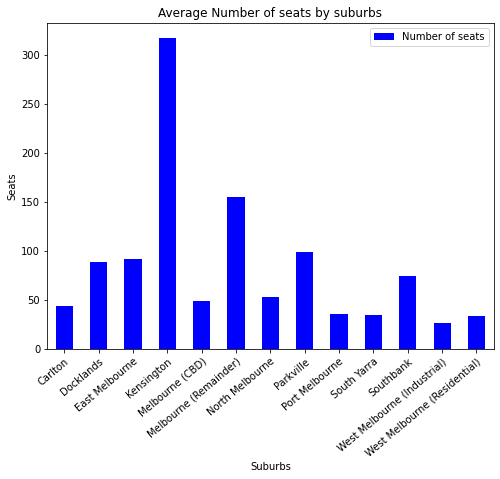

In [23]:
seats_by_suburb= pd.pivot_table(total_seats, index=['CLUE small area'],values=['Number of seats'])
figure = seats_by_suburb.plot(kind="bar", facecolor="blue",figsize=(8,6),title="Average Number of seats by suburbs", xlabel="Suburbs", ylabel="Seats")
xticklabels = seats_by_suburb.index
figure.set_xticklabels(xticklabels, rotation=40, rotation_mode="anchor", ha="right", wrap=True)
plt.show()

### Average Sitting per Industry over the timespan!

In [29]:
cafes_res_average_by_industry = pd.pivot_table(total_seats, index=['Census year','Recategorised Industry'],values=['Number of seats'])
cafes_res_average_by_industry

Number of seats
Census year Recategorised Industry                 
2002        Accommodation                119.246439
            Cafes and Restaurants         71.260916
            Others                       391.971795
            Pubs, Taverns and Bars        78.504629
            Takeaway Food Services        12.067283
...                                             ...
2020        Accommodation                 57.901339
            Cafes and Restaurants         49.500140
            Others                       220.876654
            Pubs, Taverns and Bars        98.418679
            Takeaway Food Services        13.072922

[95 rows x 1 columns]

In [38]:
cafes_res_average_by_industry.nlargest(n=10, columns=["Number of seats"])

,,Number of seats
Census year,Recategorised Industry,
2002,Others,391.971795
2003,Others,381.926190
2005,Others,352.118820
2004,Others,346.201553
2006,Others,283.693421
2007,Others,260.095358
2020,Others,220.876654
2010,Others,194.348910
2019,Others,194.117100


In [37]:
cafes_res_average_by_industry.nsmallest(n=10, columns=["Number of seats"])

,,Number of seats
Census year,Recategorised Industry,
2003,Takeaway Food Services,11.439279
2004,Takeaway Food Services,11.847930
2005,Takeaway Food Services,11.947969
2002,Takeaway Food Services,12.067283
2015,Takeaway Food Services,12.223203
2013,Takeaway Food Services,12.533265
2016,Takeaway Food Services,12.712652
2017,Takeaway Food Services,12.848499
2011,Takeaway Food Services,12.894114


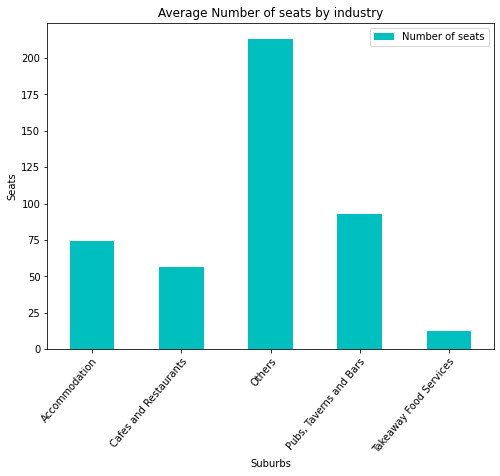

In [55]:
seats_by_industry= pd.pivot_table(total_seats, index=['Recategorised Industry'],values=['Number of seats'])
figure = seats_by_industry.plot(kind="bar", facecolor="c",figsize=(8,6),title="Average Number of seats by industry", xlabel="Suburbs", ylabel="Seats")
xticklabels = seats_by_industry.index
figure.set_xticklabels(xticklabels, rotation=50, rotation_mode="anchor", ha="right", wrap=True)
plt.show()

# Michael's Bits

# Brandon' Bits